In [1]:
from traceroute import (
    load_samples,
    RouteSamples,
    RouteResponse,
    RouterResponse,
    NoResponse,
)
import numpy as np
import seaborn as sns

sns.set(rc={'text.usetex': True ,'font.family': 'serif', 'font.serif': 'Computer Modern'})

from matplotlib import pyplot as plt


In [9]:
destinations = ["melbourne", "osaka", "oxford", "stanford"]


destination_samples: dict[str, RouteSamples] = {
    destination: load_samples(f"samples/{destination}.samples")
    for destination in destinations
}


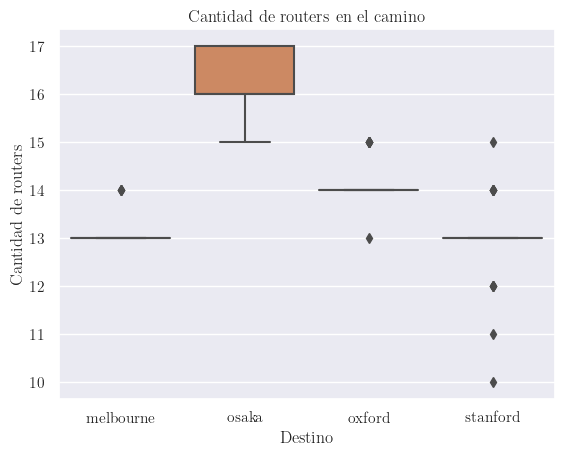

In [3]:
from stats import router_response_count


fig, ax = plt.subplots()

# Es demasiado discreto para este tipo de plots
# Hacen falta más samples, o capaz conviene poner una tabla
sns.boxplot(
    data=[
        [router_response_count(route) for route in samples]
        for samples in destination_samples.values()
    ],
    ax=ax,
)

ax.set_title("Cantidad de routers en el camino")
ax.set_ylabel("Cantidad de routers")
ax.set_xlabel("Destino")

ax.set_xticklabels(destinations)

plt.show()


/home/sponja/.local/share/virtualenvs/TP2-HcjAmORt/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sponja/.local/share/virtualenvs/TP2-HcjAmORt/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/sponja/.local/share/virtualenvs/TP2-HcjAmORt/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sponja/.local/share/virtualenvs/TP2-HcjAmORt/lib/python3.10/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/sponja/.local/share/virtualenvs/TP2-HcjAmORt/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divi

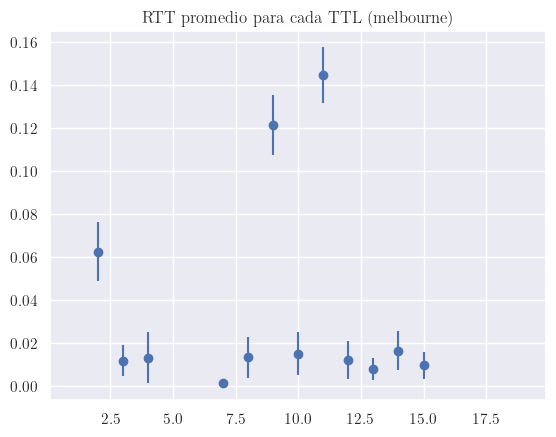

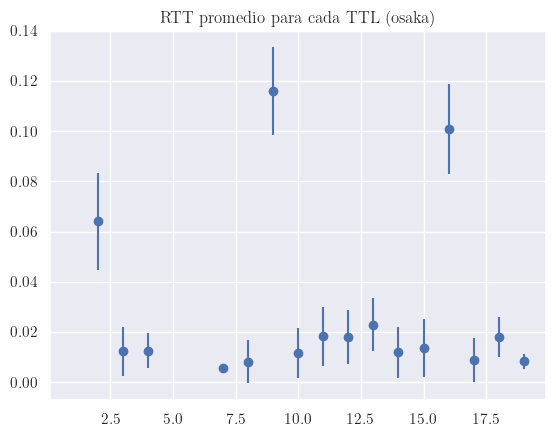

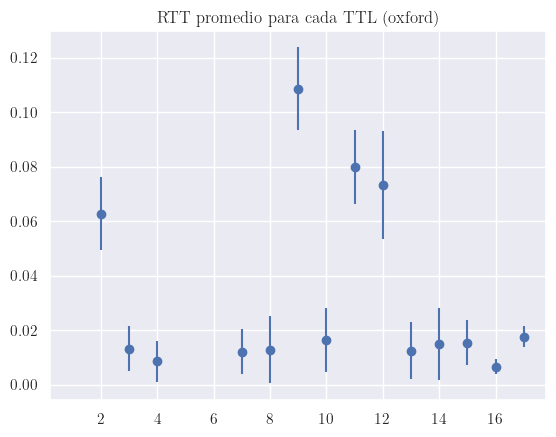

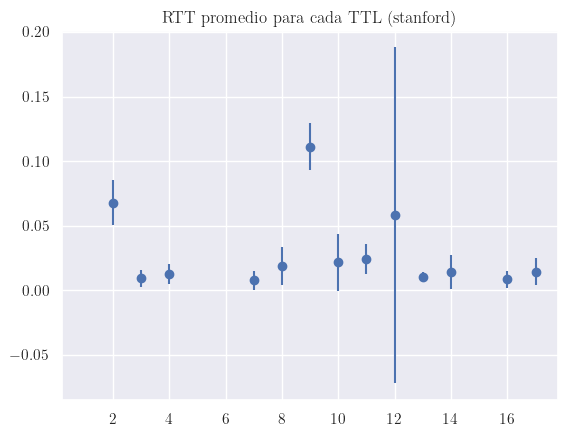

In [4]:
from stats import get_valid_segment_times_for_ttl


for destination, samples in destination_samples.items():
    fig, ax = plt.subplots()

    ttls = range(1, len(samples[0]))

    valid_segment_times = [
        get_valid_segment_times_for_ttl(samples, ttl) for ttl in ttls
    ]

    # Esto solo tiene sentido cuando las rutas son iguales (o muy parecidas) entre sí
    # Por ejemplo, si una ruta tiene 1 salto más que las demás, va a generar outliers
    # en todos los hops que estén después de ese.
    # Me parece que eso se ve en el de Stanford
    ax.errorbar(
        x=ttls,
        y=[np.mean(segment_times) for segment_times in valid_segment_times],
        yerr=[np.std(segment_times) for segment_times in valid_segment_times],
        fmt="o",
    )

    ax.set_title(f"RTT promedio para cada TTL ({destination})")

plt.show()


In [15]:
from stats import router_response_count
import pandas as pd


def int_2_latex(n: int) -> str:
    return f"${n:.2f}$"


def ratio_2_latex(r: float) -> str:
    return f"${r*100:.2f}\%$"


print(
    pd.DataFrame(
        data={
            "Destino": destinations,
            "Proporción de Respuestas": map(
                ratio_2_latex,
                [
                    np.mean(
                        [router_response_count(route) / len(route) for route in samples]
                    )
                    for samples in destination_samples.values()
                ],
            ),
            "Cantidad promedio de Respuestas": map(
                int_2_latex,
                [
                    np.mean([router_response_count(route) for route in samples])
                    for samples in destination_samples.values()
                ],
            ),
        }
    ).to_latex(index=False)
)


\begin{tabular}{lll}
\toprule
Destino & Proporción de Respuestas & Cantidad promedio de Respuestas \\
\midrule
melbourne & $65.67\%$ & $13.133333333333333$ \\
osaka & $81.17\%$ & $16.233333333333334$ \\
oxford & $78.89\%$ & $14.2$ \\
stanford & $72.04\%$ & $12.966666666666667$ \\
\bottomrule
\end{tabular}

